# K-means

Livros Recomendados

````
Livro Data Clustering: Algorithms and Applications de Charu C. Aggarwal: mostra técnicas básicas e avançadas de agrupamento, abordando vários algoritmos (esse é um dos principais livros sobre o assunto)

Capítulo 12 (K-means Clustering) do livro Data Algorithms de Mahmoud Parsian: mais sobre a teoria do algoritmo k-means

Livro Advances in K-means Clustering: A Data Mining Thinking de Junjie Wu: é uma tese de doutorado com melhorias no algoritmo k-means, caso você queira se aprofundar ainda mais
````

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

file_path = "../../files/"

## Exemplo manual para testar o Kmeans

Dados gerados semelhantes aos exemplos dos slides

Imagine que:

+ X: Idade
+ Y: Salaário


In [13]:
x = [20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y = [1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  

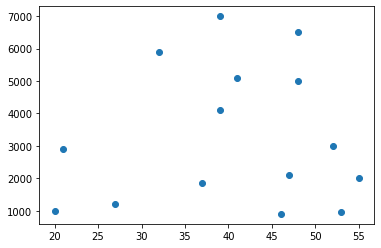

In [14]:
plt.scatter(x,y)

In [15]:
# Juntando num numpy.array
base = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                 [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                 [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [16]:
# Fazendo escalonamento
scaler = StandardScaler()
base = scaler.fit_transform(base)
base

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

### Clusterizador Kmeans

In [17]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(base)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
# Parâmetros do Kmeans
centroides = kmeans.cluster_centers_
rotulos = kmeans.labels_
print("centroides:\n", centroides)
print("rotulos dos dados:\n", rotulos)

centroides:
 [[-1.63312883 -0.77505093]
 [ 0.07703438  1.11413572]
 [ 0.73953003 -0.72661025]]
rotulos:
 [0 0 0 2 2 2 2 2 2 1 1 1 1 1 1]


### Printando Clusters e Centróides

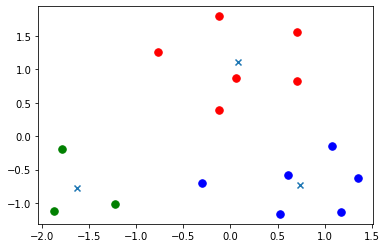

In [20]:
cores = ["g.", "r.", "b."]
for i in range(len(x)):
    plt.plot(base[i][0], base[i][1], cores[rotulos[i]], markersize = 15)
plt.scatter(centroides[:,0], centroides[:,1], marker = "x")

## Outro exemplo de dados Ranomicos para fazer agrupamento

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

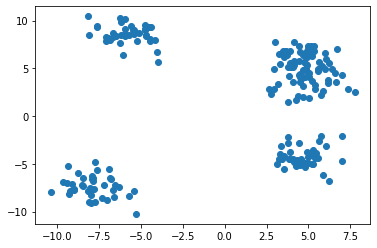

In [24]:
x, y = make_blobs(n_samples = 200, centers = 5)
plt.scatter(x[:,0], x[:,1])

In [25]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

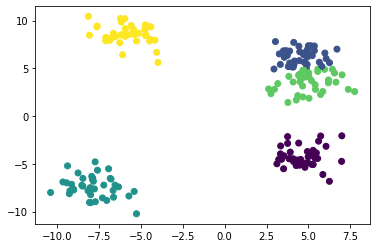

In [26]:
previsoes = kmeans.predict(x)
plt.scatter(x[:,0], x[:,1], c = previsoes)

## Base de cartão de crédito

Usamos somente um único atributo, mas poderiamos usar mais (está comentado).

Porém, se usar mais de uma feature fica impossível plotar um gráfico

In [28]:
base = pd.read_csv(file_path + 'credit_card_clients.csv', header = 1)
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +  base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [31]:
## Esolha uma desssas opções
X = base.iloc[:,[1,25]].values
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [ ]:
# Escalonando
scaler = StandardScaler()
X = scaler.fit_transform(X)

Text(0, 0.5, 'WCSS')

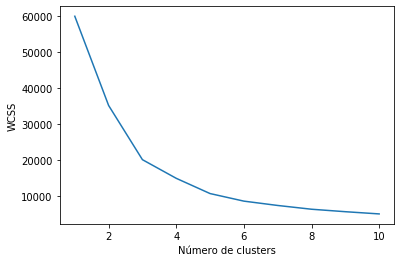

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [8]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes = kmeans.fit_predict(X)

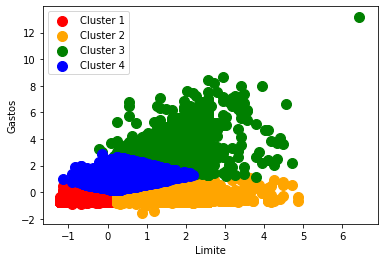

In [9]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()

In [12]:
lista_clientes = np.column_stack((base, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16776, 120000,      1, ...,      0,  13311,      0],
       [ 16775,  20000,      1, ...,      0, 110522,      0],
       ...,
       [ 17301, 110000,      2, ...,      0, 516377,      3],
       [  1695,  80000,      2, ...,      1, 516777,      3],
       [  4541, 180000,      2, ...,      0, 835665,      3]], dtype=int64)

## Base de crédito com mais de 2 atributos no X


In [32]:
base = pd.read_csv(file_path + 'credit_card_clients.csv', header = 1)
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

X = base.iloc[:,[1,2,3,4,5,25]].values
X

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]], dtype=int64)

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Text(0, 0.5, 'WCSS')

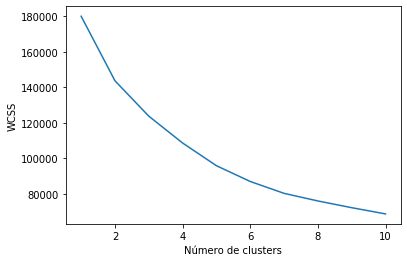

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [36]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes = kmeans.fit_predict(X)
previsoes

array([3, 2, 2, ..., 1, 3, 3], dtype=int32)

In [38]:
lista_clientes = np.column_stack((base, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[  21280,  290000,       1, ...,       0, 1490004,       0],
       [  13605,  440000,       1, ...,       1, 2525755,       0],
       [  24560,  260000,       1, ...,       0, 1312382,       0],
       ...,
       [  14545,   80000,       1, ...,       1,  478933,       3],
       [  14559,   80000,       2, ...,       0,   91344,       3],
       [  30000,   50000,       1, ...,       1,  230874,       3]],
      dtype=int64)

## K-means English ML-AZ

In [39]:
dataset = pd.read_csv(file_path + 'Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
# Selecionando Idade e Annual Income
X = dataset.iloc[:, [3, 4]].values
X[0:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

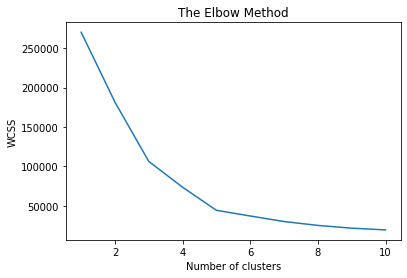

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

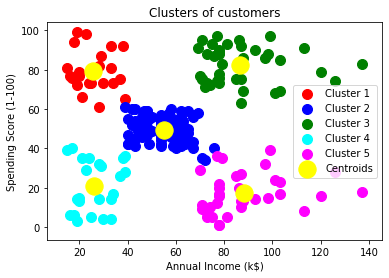

In [45]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Questions K-Means Clustering

### K-Means Clustering Intuition

Where can we apply clustering algorithm in real life?

You can apply them for different purposes:
- Market Segmentation,
- Medicine with for example tumor detection,
- Fraud detection,
- to simply identify some clusters of your customers in your company or business.

How does the perpendicular line trick work when k ≥ 3?

This trick is mainly used only in 2D or 3D spaces. Usually, the Euclidean distance is used on all points
for high dimensions to perform the clustering. In very high dimensional data, we could do a trick, which
is an "engulfing sphere" i.e. starting at every centroid (k spheres in total), start growing a spherical space
(circle in 2D, sphere in 3D, etc), outward radially. Until the spheres intersect, everything the sphere engulfs
belongs to the same cluster. All the other points can be assigned to clusters by calculating the perpendicular
distance between the centroids.

How does the elbow method work when more than 2 features are involved?

It is the same but we use the Euclidean distance in n dimensions to compute the WCSS (p and q are two
observation points, and their coordinates p 1 , ..., p n , q 1 , ..., q n are the features of these observation points):

````
d(p, q) = (p 1 − q 1 ) 2 + (p 2 − q 2 ) 2 + ... + (p n − q n ) 2
````

Is there an alternative way to the Elbow method to find the ultimate number of clusters?
Sure, an alternative way would be through Parameter Tuning with Grid Search, which you will see in Part
10 - Model Selection.

### K-Means Clustering in Python

What is exactly the parameter ’max_iter’ in the KMeans() class?

When we apply k-Means, we jump back to the previous step many times (see the Intuition Lectures). Each
time we do that, that is an iteration. And max_iter is the maximum number of these iterations.

Why do we not consider the age as a parameter?
We don’t consider the age for two reasons:
1. I had pre-checked it had not impact on the dependent variable.
2. I wanted to have two independent variables in the end, so that we can visualize the results in two
dimensions (since one independent variable corresponds to one dimension).

How to get statistics for each of the clusters?

The simplest way to get some statistical information of the clusters is to use the cluster_centers_ attribute
of the KMeans class. It will give an array with the coordinates of each cluster, that is the mean of each
feature column of each cluster. Then you can also get some info about the observation points by using the
labels_ attribute. You can call for these attributes this way:

````python
kmeans.cluster_centers_
kmeans.labels
````
Then, you could get some useful values like the number of elements in each cluster, the mean of the salaries
or spending scores in each cluster, etc. The best way to do this is to put your five clusters into 5 variables
this way:

````python
Cluster_0 = X[y_kmeans == 0]
Cluster_1 = X[y_kmeans == 0]
Cluster_2 = X[y_kmeans == 0]
Cluster_3 = X[y_kmeans == 0]
Cluster_4 = X[y_kmeans == 0]
````

Then you get whatever you want with these variables that are exactly the clusters.
For example if you are interested in having the count of observations for each cluster, well that you can now
see it directly in Variable Explorer by looking at the number of rows for each cluster. Or you can do this:

````python
len(Cluster_0)
len(Cluster_1)
len(Cluster_2)
len(Cluster_3)
len(Cluster_4)
````
Then you can get the mean and the standard deviation of each feature of your cluster this way

````python
Cluster_0[0].mean()
Cluster_1[0].mean()
Cluster_2[0].mean()
Cluster_3[0].mean()
Cluster_4[0].mean()
Cluster_0[0].std()
Cluster_1[0].std()
Cluster_2[0].std()
Cluster_3[0].std()
Cluster_4[0].std()
````